<a href="https://colab.research.google.com/github/hetaskesen/FeedbackAutomation/blob/main/UI_Focused_Daily_Feedback_Automator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use:
**All** of the code is already written, do not edit any of it, instead read the titles above each section to see what it does, the steps will already be in order. 🎉

**Follow the order of the sections**, read what the section does, when you understand as much as you want from it, hover over the [ ] on the top left and click the arrow which appears

The last section will be to download the graphics, when everything else is done, run that and it should upload all the graphics as an image

## Input Whova Feedback Files
Click the arrow, scroll down, click 'Choose Files', select and upload all the files you want included
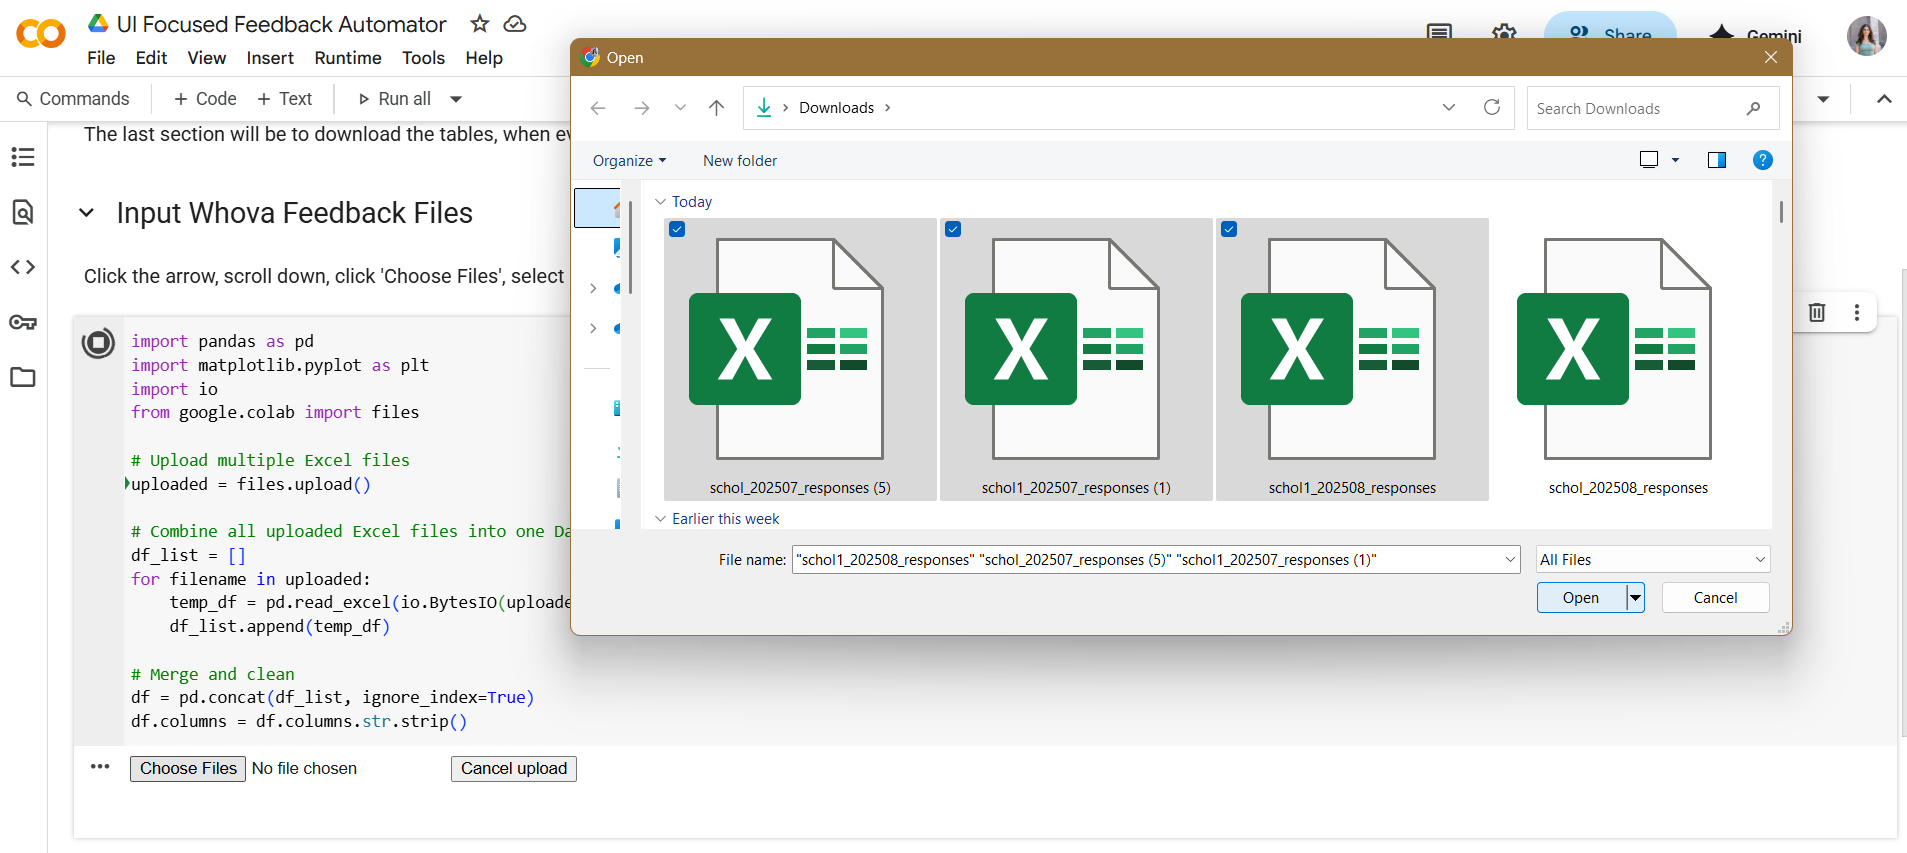

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

# Upload multiple Excel files
uploaded = files.upload()

# Combine all uploaded Excel files into one DataFrame
df_list = []
for filename in uploaded:
    temp_df = pd.read_excel(io.BytesIO(uploaded[filename]))
    df_list.append(temp_df)

# Merge and clean
df = pd.concat(df_list, ignore_index=True)
df.columns = df.columns.str.strip()

Saving schol_202507_responses (5).xlsx to schol_202507_responses (5).xlsx
Saving schol1_202507_responses (1).xlsx to schol1_202507_responses (1) (1).xlsx
Saving schol1_202508_responses.xlsx to schol1_202508_responses.xlsx


## Select Date(s)
Click the arrow, look at the dates where data has been found, follow the instructions in the terminal (lines that show up under the

**Follow the notation completely, if you want June 3rd (6/3) you will need to put 2025-06-03**

In [4]:
# Show available dates
available_dates = sorted(df['Date'].unique())
print("\n📅 Available dates in dataset:")
for d in available_dates:
    print(d)

# Ask user for time range type
mode = input("\nDo you want to analyze 'one' day or 'multiple' days? (type one or multiple): ").strip().lower()

if mode == 'one':
    day_input = input("Enter the date (YYYY-MM-DD): ")
    start_date = end_date = pd.to_datetime(day_input).date()
else:
    start_input = input("Enter START date (YYYY-MM-DD): ")
    end_input = input("Enter END date (YYYY-MM-DD): ")
    start_date = pd.to_datetime(start_input).date()
    end_date = pd.to_datetime(end_input).date()


📅 Available dates in dataset:
2025-06-22
2025-06-23
2025-06-24
2025-06-25
2025-06-26
2025-06-27
2025-06-28
2025-06-29
2025-06-30
2025-07-01
2025-07-02
2025-07-03
2025-07-04
2025-07-05
2025-07-06
2025-07-07
2025-07-08
2025-07-09
2025-07-10

Do you want to analyze 'one' day or 'multiple' days? (type one or multiple): One
Enter the date (YYYY-MM-DD): 2025-06-29


## Data Filtering

Feel free to expand cell to look at filtering process, but just click the arrow and the data will filter down per date and site - no input needed

In [8]:

# Filter data by selected date range
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(f"\n✅ {len(filtered_df)} responses found between {start_date} and {end_date}")

# Map question text to short labels
question_label_map = {
    "This session was aligned to the defined objectives of the course.": "Aligned to objectives",
    "This session expanded my knowledge beyond what I am learning at my university education classes.": "Expanded Knowledge",
    "The session was engaging and modeled instructional best practices.": "Session was engaging"
}

rating_columns = [col for col in filtered_df.columns if any(
    kw in col.lower() for kw in ["aligned", "expanded", "engaging"]
)]

# Extract site name from session track
filtered_df['Site'] = filtered_df['Session Track(s)'].astype(str).apply(lambda x: x.split()[0] if pd.notna(x) else 'Other')
all_sites = filtered_df['Site'].unique()


✅ 56 responses found between 2025-06-29 and 2025-06-29


/tmp/ipython-input-8-2656938350.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Site'] = filtered_df['Session Track(s)'].astype(str).apply(lambda x: x.split()[0] if pd.notna(x) else 'Other')


## Site Averages Table
This will create **and download** the site averages table,

To review the table but **not** download it, click the **first** arrow, if you just want to download it click the arrow of the next two sections

Average Ratings per Site:


,Site,Aligned to objectives,Expanded Knowledge,Session was engaging
0,NCC,4.93,4.67,4.81
1,NIU,4.58,4.42,4.42
2,UIUC,4.06,4.18,3.82


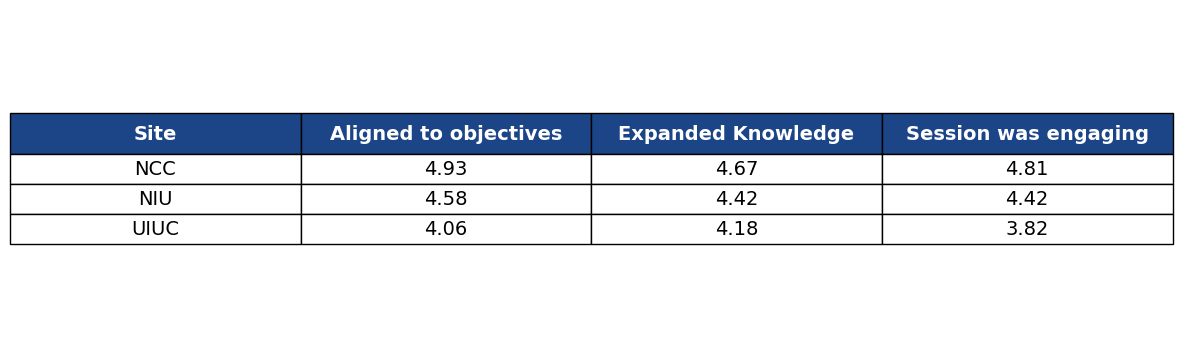

In [10]:
# ---------- Create and Save Average Table as PNG ---------- #
avg_df = filtered_df.groupby("Site")[rating_columns].mean().round(2).reset_index()

# Rename columns to shortened labels
short_label_map = {full: question_label_map[full] for full in rating_columns}
avg_df = avg_df.rename(columns=short_label_map)

print("Average Ratings per Site:")
display(avg_df)

# Create the figure and table
fig, ax = plt.subplots(figsize=(len(avg_df.columns) * 2.5, len(avg_df) * 0.8 + 2))
ax.axis('off')

table = ax.table(
    cellText=avg_df.values,
    colLabels=avg_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#1c4587'] * len(avg_df.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.8)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#1c4587')
        cell.set_height(0.12)

# Dynamically name file based on date range
if start_date == end_date:
    date_label = start_date.strftime('%Y%m%d')
else:
    date_label = f"{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}"

table_filename = f"Average_Ratings_Per_Site_Table_{date_label}.png"

plt.savefig(table_filename, bbox_inches='tight', transparent=False)
plt.show()


### To download the table click the arrow below

In [ ]:
files.download(table_filename)

## Graphics for Each Site
This will create **and download** each sites data,

To review the table but **not** download it, expand this tab and click the **first** arrow, if you just want to download it click the arrow of the next two sections


📊 Site: UIUC


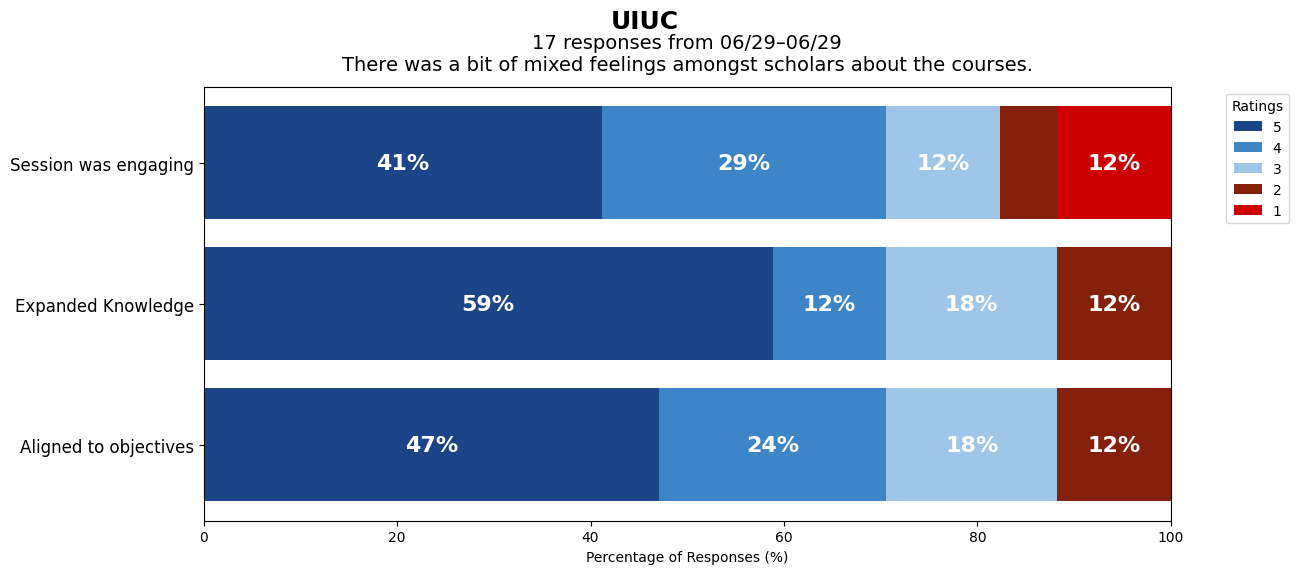


📊 Site: NIU


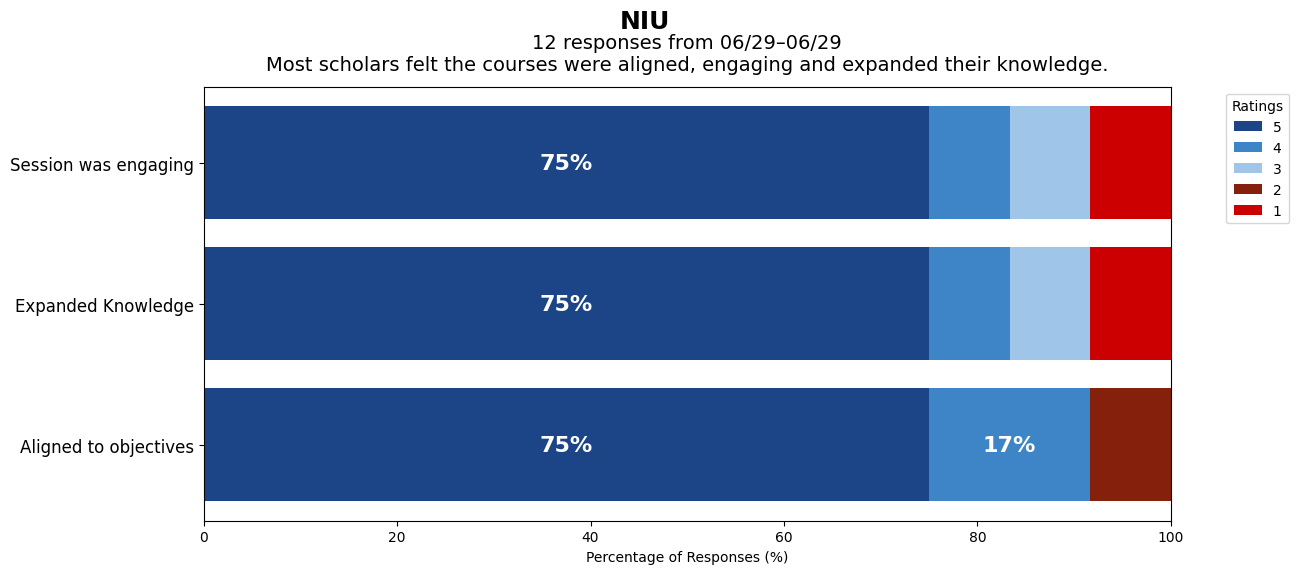


📊 Site: NCC


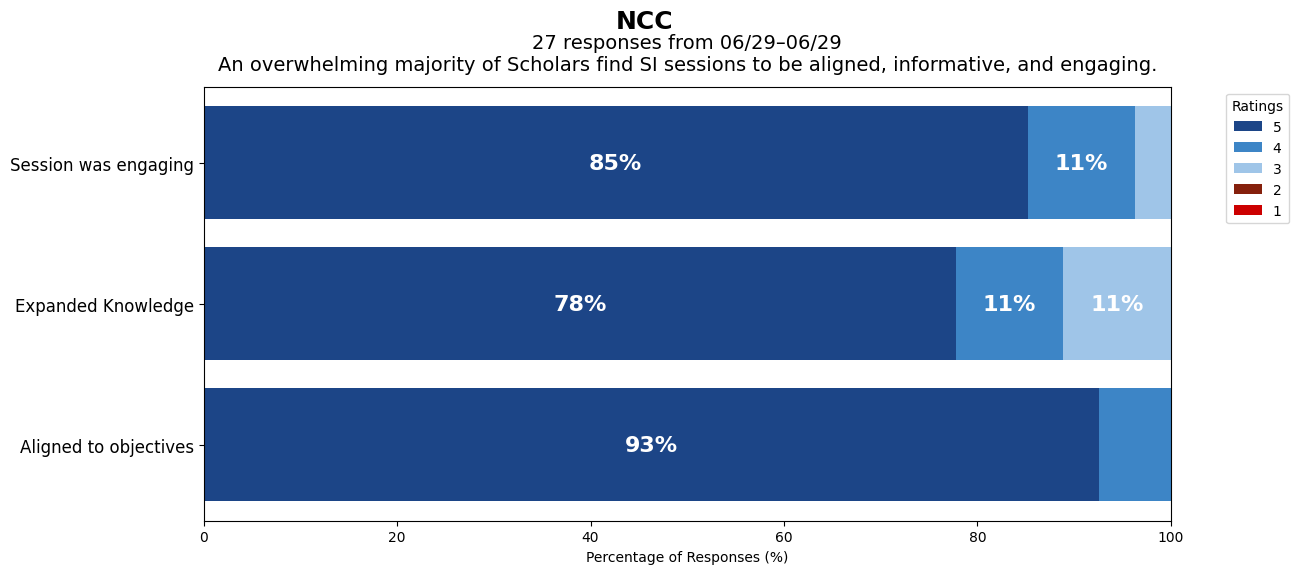

In [11]:
# ---------- Graphs per Site (based on selected date range) ---------- #
for site in all_sites:
    site_df = filtered_df[filtered_df["Site"] == site]

    if site_df.empty:
        print(f"No responses for {site} in selected date range.")
        continue

    site_summary_rows = []

    for question in rating_columns:
        counts = site_df[question].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0).astype(int)
        total = counts.sum()
        percentages = (counts / total * 100).round(2)

        row = {
            "Short Question": question_label_map[question],
            "1": percentages[1],
            "2": percentages[2],
            "3": percentages[3],
            "4": percentages[4],
            "5": percentages[5]
        }
        site_summary_rows.append(row)

    summary_df = pd.DataFrame(site_summary_rows)

    total_responses = len(site_df)
    total_fives = summary_df["5"].mean()

    if total_fives > 80:
        subtitle = 'An overwhelming majority of Scholars find SI sessions to be aligned, informative, and engaging.'
    elif 55 <= total_fives <= 80:
        subtitle = 'Most scholars felt the courses were aligned, engaging and expanded their knowledge.'
    else:
        subtitle = 'There was a bit of mixed feelings amongst scholars about the courses.'

    # Plot
    fig, ax = plt.subplots(figsize=(13, 6))
    categories = ["5", "4", "3", "2", "1"]
    bottom = pd.Series([0] * len(summary_df))
    colors = ['#1c4587', '#3d85c6', '#9fc5e8', '#85200c', '#cc0000']
    bars = []

    for idx, cat in enumerate(categories):
        bars.append(ax.barh(summary_df['Short Question'], summary_df[cat], left=bottom, label=f'{cat}', color=colors[idx]))
        bottom += summary_df[cat]

    for idx, cat in enumerate(categories):
        for bar_idx, bar in enumerate(bars[idx]):
            width = bar.get_width()
            if width > 10:
                ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                        f'{width:.0f}%', ha='center', va='center', color='white', fontsize=16, fontweight='bold')

    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentage of Responses (%)')
    plt.suptitle(f'{site}', fontsize=18, fontweight='bold', y=0.95)

    # Show date range in title
    title_range = f"{start_date.strftime('%m/%d')}–{end_date.strftime('%m/%d')}"
    ax.set_title(f'{total_responses} responses from {title_range}\n{subtitle}', fontsize=14, pad=12)

    ax.tick_params(axis='y', labelsize=12)
    plt.subplots_adjust(left=0.3)
    ax.legend(title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    filename = f"{site.replace(' ', '_')}_{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}_graph.png"
    plt.savefig(filename, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close(fig)

### To download the graphics **for every site** click the arrow below

In [ ]:
files.download(table_filename)